In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('CustomerData.csv')
df = df.bfill()
encoder = preprocessing.LabelEncoder()
df[['category', 'purchase type ', 'gender']] = df[['category', 'purchase type ', 'gender']].apply(encoder.fit_transform)
df.head()

features = df[['age', 'gender', 'annual income (lakhs)']]
target = df['purchase type ']
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.3)


In [6]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()

classifierDT.fit(x_train, y_train)

predicted_labels = classifierDT.predict(x_test)

classifierDT.score(x_test, y_test)

0.6111111111111112

Confusion Matrix
[[5 4]
 [3 6]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.60      0.67      0.63         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18

Area under the curve: 0.6111111111111112


[]

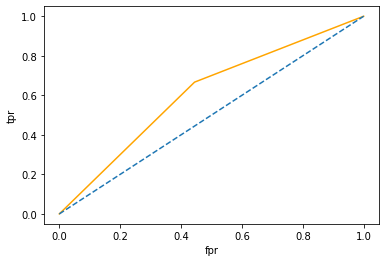

In [7]:
from sklearn import metrics

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))
probability = classifierDT.predict_proba(x_test)[:, 1]
print("Area under the curve:", metrics.roc_auc_score(y_test, probability))
fpr, tpr, threshold = metrics.roc_curve(y_test, probability)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fpr, tpr, color = 'orange')
plt.plot([0,1], [0, 1], linestyle='--')
plt.plot()